In [2]:
import requests
import base64
import json
import mimetypes

In [4]:
def get_mimetype(filename):
    mimetype = mimetypes.guess_type(filename)[0]
    if mimetype is not None:
        mimetype = mimetype.replace("x-wav", "wav").replace("x-flac", "flac")
    return mimetype

In [5]:
def encode_file_to_base64(f, encryption_key=None):
    with open(f, "rb") as file:
        encoded_string = base64.b64encode(file.read())
        if encryption_key:
            encoded_string = encryptor.decrypt(encryption_key, encoded_string)
        base64_str = str(encoded_string, "utf-8")
        mimetype = get_mimetype(f)
        return (
            "data:"
            + (mimetype if mimetype is not None else "")
            + ";base64,"
            + base64_str
        )

''
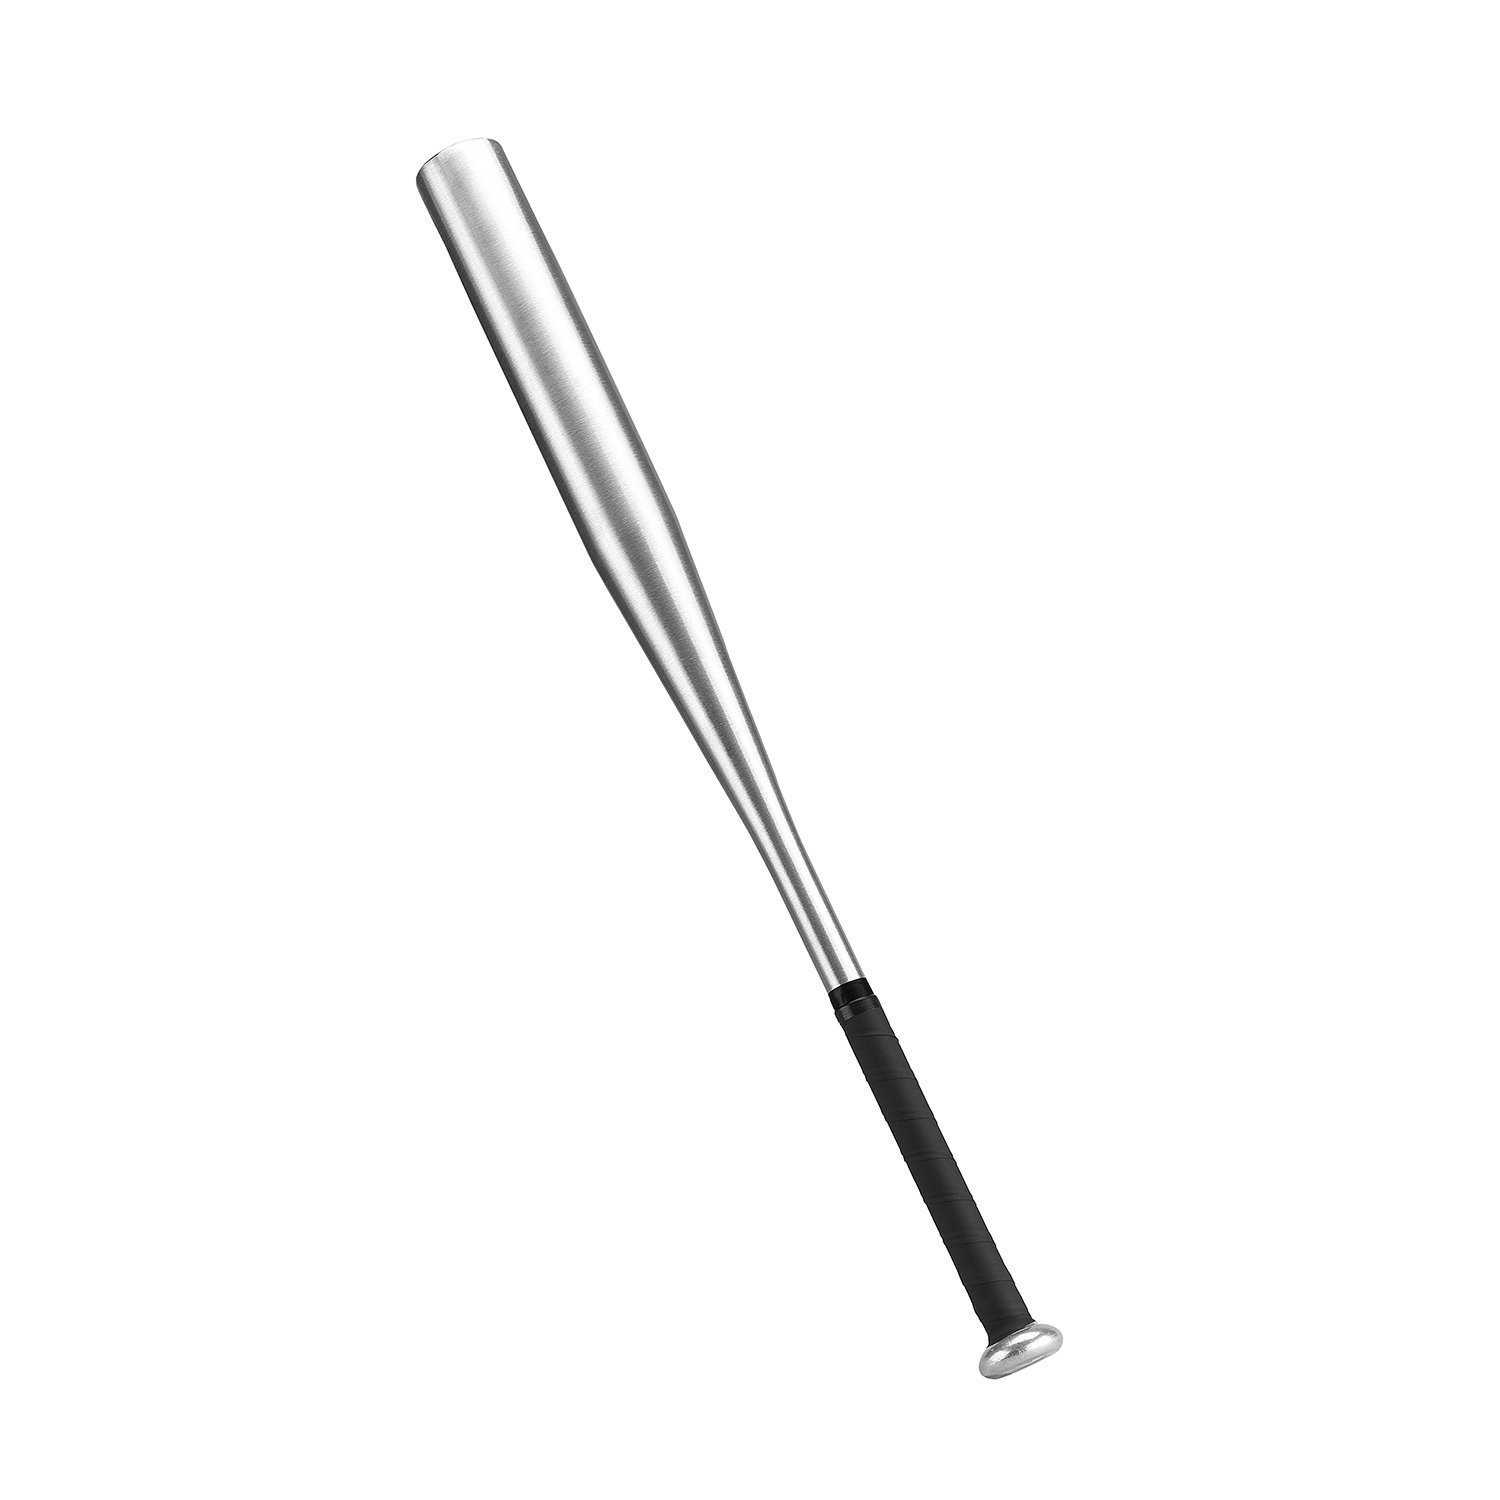

In [7]:
imb64 = encode_file_to_base64('nb_files/baseball_bat.jpg')
imb64

In [8]:
url = 'https://hf.space/embed/agnair00/baseball_or_cricket/+/api/predict'

In [9]:
resp = requests.post(url, json={"data": [imb64]})

In [10]:
print(resp.content)

b'{"data":[{"label":"baseball bat","confidences":[{"label":"baseball bat","confidence":0.9999982118606567},{"label":"cricket bat","confidence":1.7714479554342688e-6}]}],"is_generating":false,"duration":0.04850888252258301,"average_duration":0.04783815145492554}'
